In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 8.0]

C:\Users\matth\AppData\Local\conda\conda\envs\fastai\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [ ]:
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

In [4]:
from pandas_summary import DataFrameSummary

In [5]:
# import my Finance Analysis Tools (fat)
import finance as fat

In [6]:
# full imports of fastai fail on windows, so just import some of it for now
from fastai.structured import add_datepart, apply_cats, proc_df

In [7]:
TICKER = 'IAU'
PATH = f'data/{TICKER}-test'

## Load Ticker

In [40]:
data = fat.create_price_data(TICKER)
data = data['2018-01-01':]

Loaded data for IAU: 2005-01-28 to 2018-03-06.


In [41]:
df_volume = data['Volume'].copy()
df_ohlc = pd.DataFrame(data).copy()
del df_ohlc['Volume']
del df_ohlc['Adj Close']

In [42]:
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

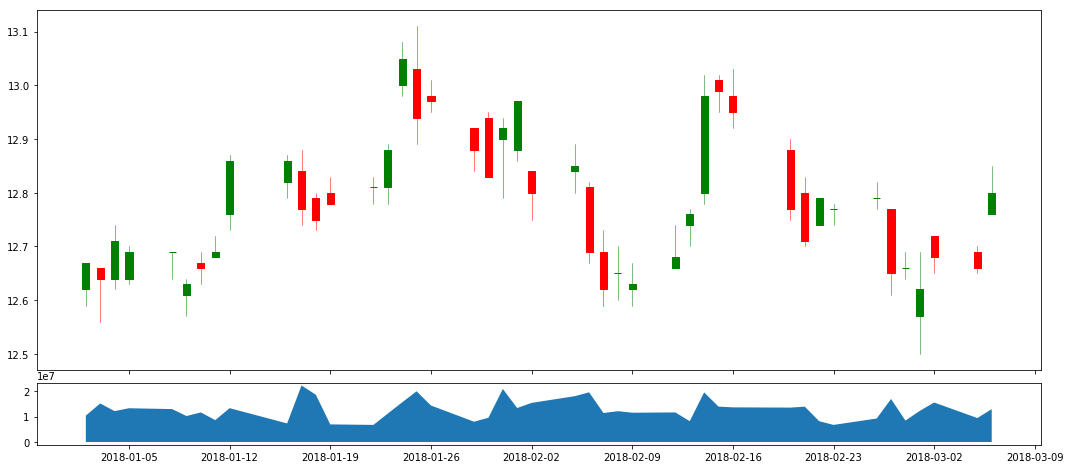

In [45]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
a = ax1.xaxis_date()

a = candlestick_ohlc(ax1, df_ohlc.values, width=0.5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

for label in ax1.get_xticklabels():
            label.set_visible(False)
plt.show()

### Calculate and plot price data with MACD

Last Hist: 2018-02-22T00:00:00.000000000: -0.09343439923934538


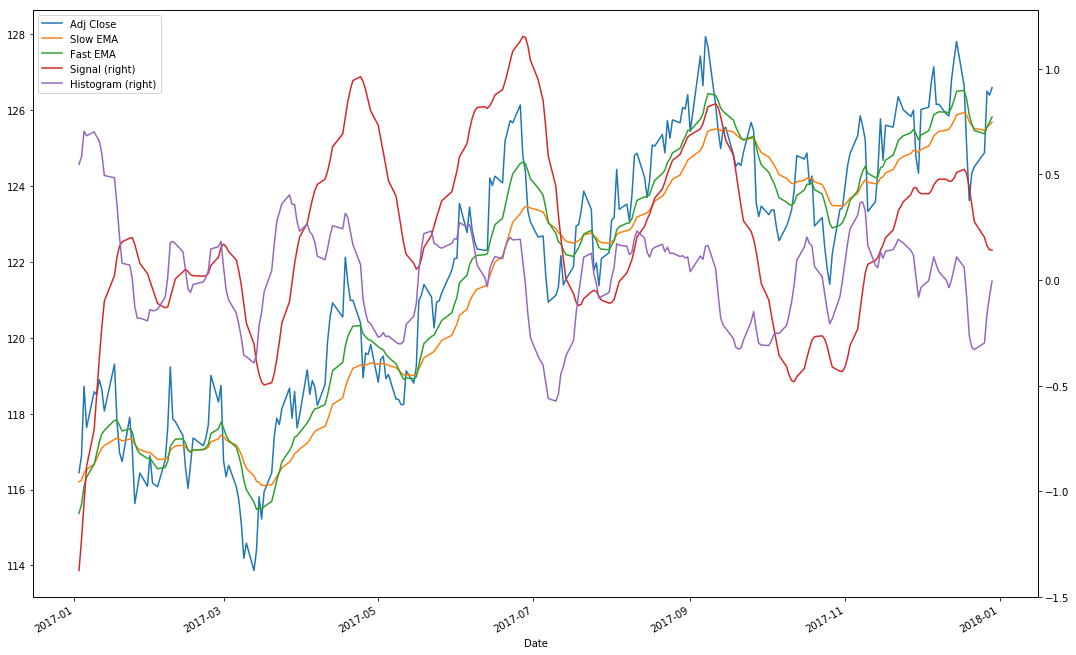

In [13]:
price = pd.DataFrame(data['Adj Close'])
macd_df = fat.get_macd_df(price, 'Adj Close')
plot_data = macd_df[['Adj Close', 'Slow EMA', 'Fast EMA', 'Signal','Histogram']]
print(f'Last Hist: {macd_df.index.values[-1]}: {macd_df["Histogram"][-1]}')
plot_data['2017'].plot(secondary_y = ['Signal','Histogram'])